<a href="https://colab.research.google.com/github/banuelosDaniel/banuelosDaniel/blob/main/Credit_Card_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By - Daniel Bañuelos
## Objective: Perform Data Analysis and apply Machine Learning methods on Credit Card dataset to build a quality model that can predict the outcome of future applications.
### Problem Type: Machine Learning - Supervised Learning - Binary Classification
### The notebook will serve as educational purposes to explore different ML methods

# Loading in the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv("drive/My Drive/clean_dataset.csv")
df.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


# Framing the Problem and the bigger picture


1.   What is the objective in business terms?
2.   How will the solution be used?
3.   What are the current solutions?
4.   How should we frame this problem?
5.   How should performance be measured?
6.   Is the performance measure aligned with the business objective?





1.   Build a classification model that will approve or deny credit card applications.
2.   The solution will be used for Credit Card companies to assist and hopefully provide a more accurate and efficient solution to handling applications
3.   There are already automated solutions used by credit card bureaus.
4.   This task is a supervised binary classification task. We are given a dataset with labels denoting the approval status of applicants.
5.   Given that this is a classification task we should consider metrics aside from accuracy. First we need to determine whether our model is more concerned with false positives or false negatives. False positives in this case is when an applicant was approved when they should have been denied. False negatives are when an applicant is denied when they could have been approved. Now from a business stand point which case (FP or FN) is more detrimental to the business? Let's say we want to prioritize denying those who are not qualified. So we will try to limit the number of FP.
6.   Our performance measure aligns with the business objective of providing a reliable model to classify and review credit card applications in the best interest of the customer.



# Clean the Data

In [4]:
#Let's look at one observation in the dataset
df.head(1)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1


*   Each row in the dataset equates to an individual credit card application. The columns define attributes of the individual which are used to determine the approval or denial of the application. 

*   Each observation/row has the 'Approved' label attached. We will use these labels as our target to train our model.



Remove any variables that cause bias: Gender, Ethnicity, and ZipCode.
These variables should not dictate whether a person is approved for a credit card.

In [5]:
columns_to_drop = ['Gender','Ethnicity','ZipCode']
df = df.drop(columns_to_drop, axis=1)

In [6]:
df.head(1)

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,30.83,0.0,1,1,Industrials,1.25,1,1,1,0,ByBirth,0,1


Convert 'Age' to int

In [7]:
df['Age'] = df['Age'].astype(int)

In [8]:
df.dtypes

Age                 int64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
Income              int64
Approved            int64
dtype: object

Taking a look at the variable types we should note a few oddities. Our dataset should only have 5 numeric variables. The rest should be categorical variables.

*   Numeric variables: Age, Debt, Income, YearsEmployed, CreditScore
*   Categorical variables: Married, BankCustomer, Industry, PriorDefault, Employed, DriversLicense, Citizen, Aproved

We can take a further look using the describe() function.

In [9]:
df.describe()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.066667,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,1017.385507,0.444928
std,11.859906,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,5210.102598,0.497318
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,28.000000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,5.000000,0.000000
75%,37.000000,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,395.500000,1.000000
max,80.000000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,100000.000000,1.000000


.describe() shows the distribution of all the numerical variables in the DataFrame. We can use this information displayed to confirm our initial judgements of the data types. For example, let's focus on 'Married' the distribution appears to  be discrete with 0 and 1 being the only values. This is mostly likely meant to be a binary categorical variable to denote whether the applicant is married or not. The only variables that do not have this characertistic are (Age, Debt, YearsEmployed, CreditScore, and Income)

Let's solidify our assumptions by taking a closer look at the variables we suspect are categorical.

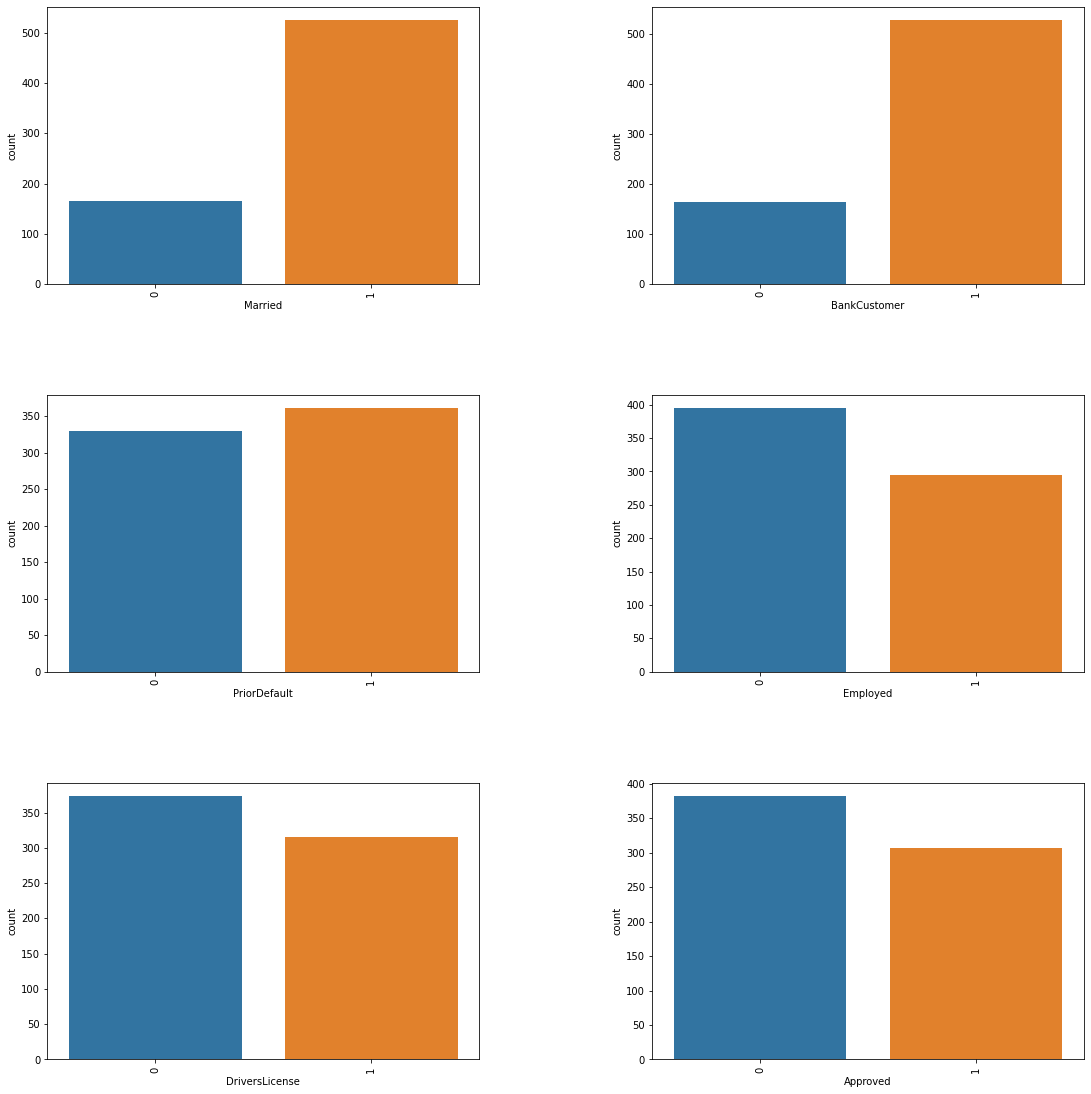

In [10]:
potential_categorical = ['Married','BankCustomer','PriorDefault','Employed','DriversLicense','Approved']

plt.figure(figsize= (18,25))
for i in enumerate(potential_categorical):
  plt.subplot(4,2,i[0]+1)
  sns.countplot(x=i[1],data=df)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

After viewing the countplots we can verify our assumptions that the variables are indeed categorical. The variables onlt have values of (0,1) and should therefore be converted from int64 to categorical.

In [11]:
#Lets also convert Industry and Citizen. They are currently type: object which acts similar to categorical
#We will convert simply for consistency

convert_to_category = ['Married','BankCustomer','Industry','PriorDefault','Employed','DriversLicense','Citizen','Approved']
df[convert_to_category] = df[convert_to_category].astype('category')

In [12]:
numeric_variables = df.select_dtypes(exclude=['category']).columns
categorical_variables = df.select_dtypes(include=['category']).columns

print(f'All the numeric variables in our dataset:\n{numeric_variables}')
print(f'\n\nAll the categorical variables in out dataset:\n{categorical_variables}')

All the numeric variables in our dataset:
Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'], dtype='object')


All the categorical variables in out dataset:
Index(['Married', 'BankCustomer', 'Industry', 'PriorDefault', 'Employed',
       'DriversLicense', 'Citizen', 'Approved'],
      dtype='object')


Check for any null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             690 non-null    int64   
 1   Debt            690 non-null    float64 
 2   Married         690 non-null    category
 3   BankCustomer    690 non-null    category
 4   Industry        690 non-null    category
 5   YearsEmployed   690 non-null    float64 
 6   PriorDefault    690 non-null    category
 7   Employed        690 non-null    category
 8   CreditScore     690 non-null    int64   
 9   DriversLicense  690 non-null    category
 10  Citizen         690 non-null    category
 11  Income          690 non-null    int64   
 12  Approved        690 non-null    category
dtypes: category(8), float64(2), int64(3)
memory usage: 34.0 KB


#Preparing the Data

Lets take a further look into the data.


*   Ensure that the entries of the categorical variables are unique and distinct
*   Ensure that the values of the numeric variables make sense
*   Eliminiate any outliers



In [14]:
#Make a copy of the data

data = df.copy()

In [15]:
data['Married'].value_counts()

1    525
0    165
Name: Married, dtype: int64

In [16]:
data['BankCustomer'].value_counts()

1    527
0    163
Name: BankCustomer, dtype: int64

In [17]:
data['Industry'].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [18]:
data['PriorDefault'].value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [19]:
data['Employed'].value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [20]:
data['DriversLicense'].value_counts()

0    374
1    316
Name: DriversLicense, dtype: int64

In [21]:
data['Citizen'].value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [22]:
data['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

After checking the value counts we have ensured that the values are distinct. We should look into 'Industry' and consider merging some of the lesser values into a single category. We should also consider converting the binary (0,1) into the respective categories for easier readibility and understanding.

Let's begin by merging some of the values in Industry which have few entires into a single value: "Other"

In [23]:
categories_to_combine = ['Education','Research','Transport']
data = data.replace(to_replace = categories_to_combine,value='Other')
data['Industry'].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Other                     38
Utilities                 38
Real Estate               30
Name: Industry, dtype: int64

Lets convert the values of the categorical columns from (0,1) to their respective values.

In [24]:
data["Married"] = np.where(data["Married"] == 0, 'Unmarried', 'Married')

In [25]:
data['Married'].value_counts()

Married      525
Unmarried    165
Name: Married, dtype: int64

In [26]:
data["BankCustomer"] = np.where(data["BankCustomer"] == 0, 'No', 'Yes')
data["PriorDefault"] = np.where(data["PriorDefault"] == 0, 'No', 'Yes')
data["Employed"] = np.where(data["Employed"] == 0, 'Employed', 'Unemployed')
data["DriversLicense"] = np.where(data["DriversLicense"] == 0, 'Has', 'Does not have')
data["Approved"] = np.where(data["Approved"] == 0, 'Rejected', 'Accepted')

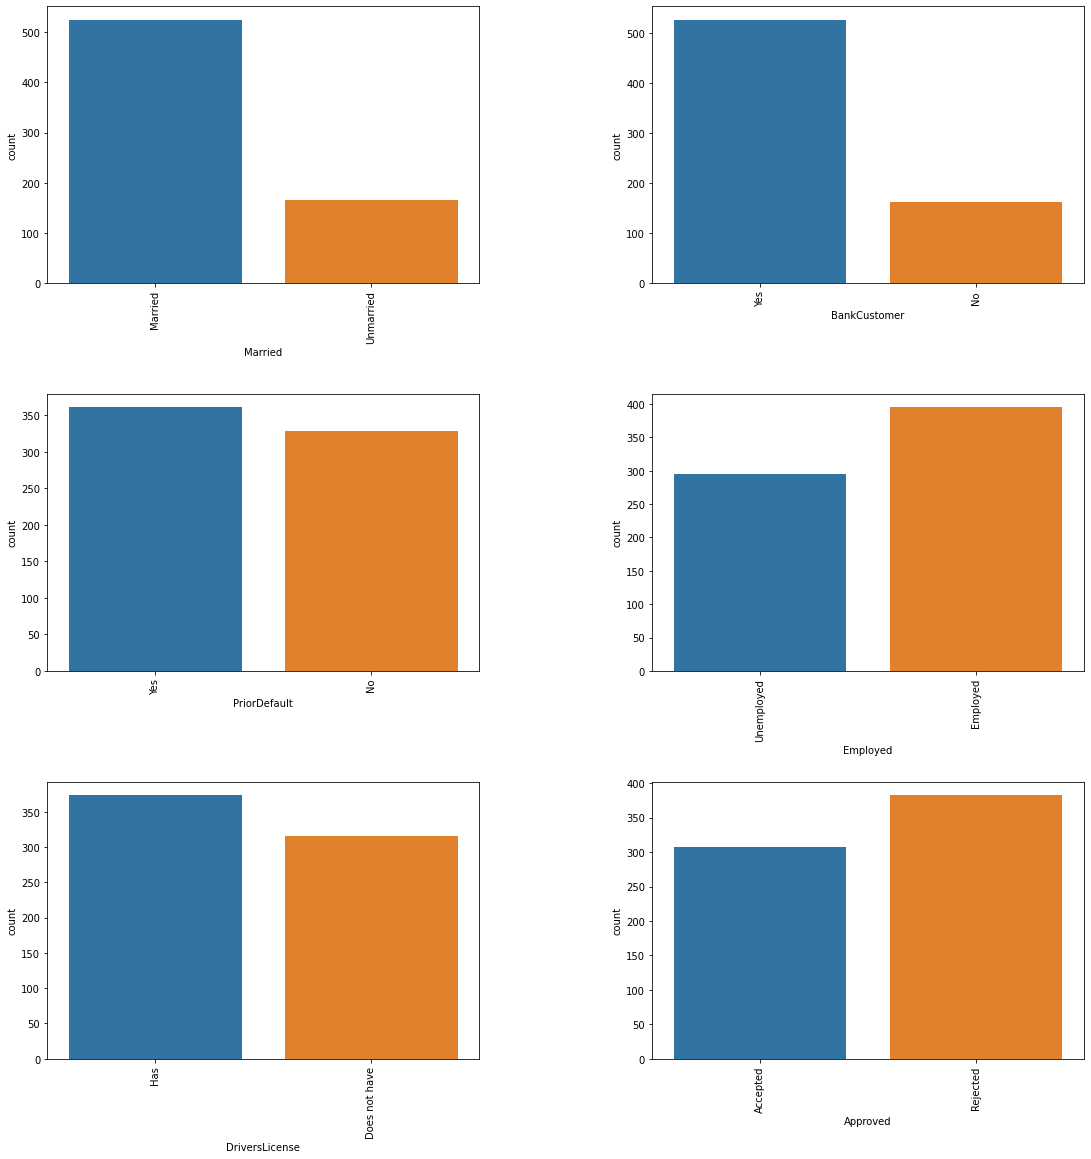

In [27]:
plt.figure(figsize= (18,25))
for i in enumerate(potential_categorical):
  plt.subplot(4,2,i[0]+1)
  sns.countplot(x=i[1],data=data)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [28]:
#Let's see the data once again
data.head(5)

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,30,0.000,Married,Yes,Industrials,1.25,Yes,Unemployed,1,Has,ByBirth,0,Accepted
1,58,4.460,Married,Yes,Materials,3.04,Yes,Unemployed,6,Has,ByBirth,560,Accepted
2,24,0.500,Married,Yes,Materials,1.50,Yes,Employed,0,Has,ByBirth,824,Accepted
3,27,1.540,Married,Yes,Industrials,3.75,Yes,Unemployed,5,Does not have,ByBirth,3,Accepted
4,20,5.625,Married,Yes,Industrials,1.71,Yes,Employed,0,Has,ByOtherMeans,0,Accepted


The data is now easier to read and understand. Let's move to the numeric data and make sense of it.

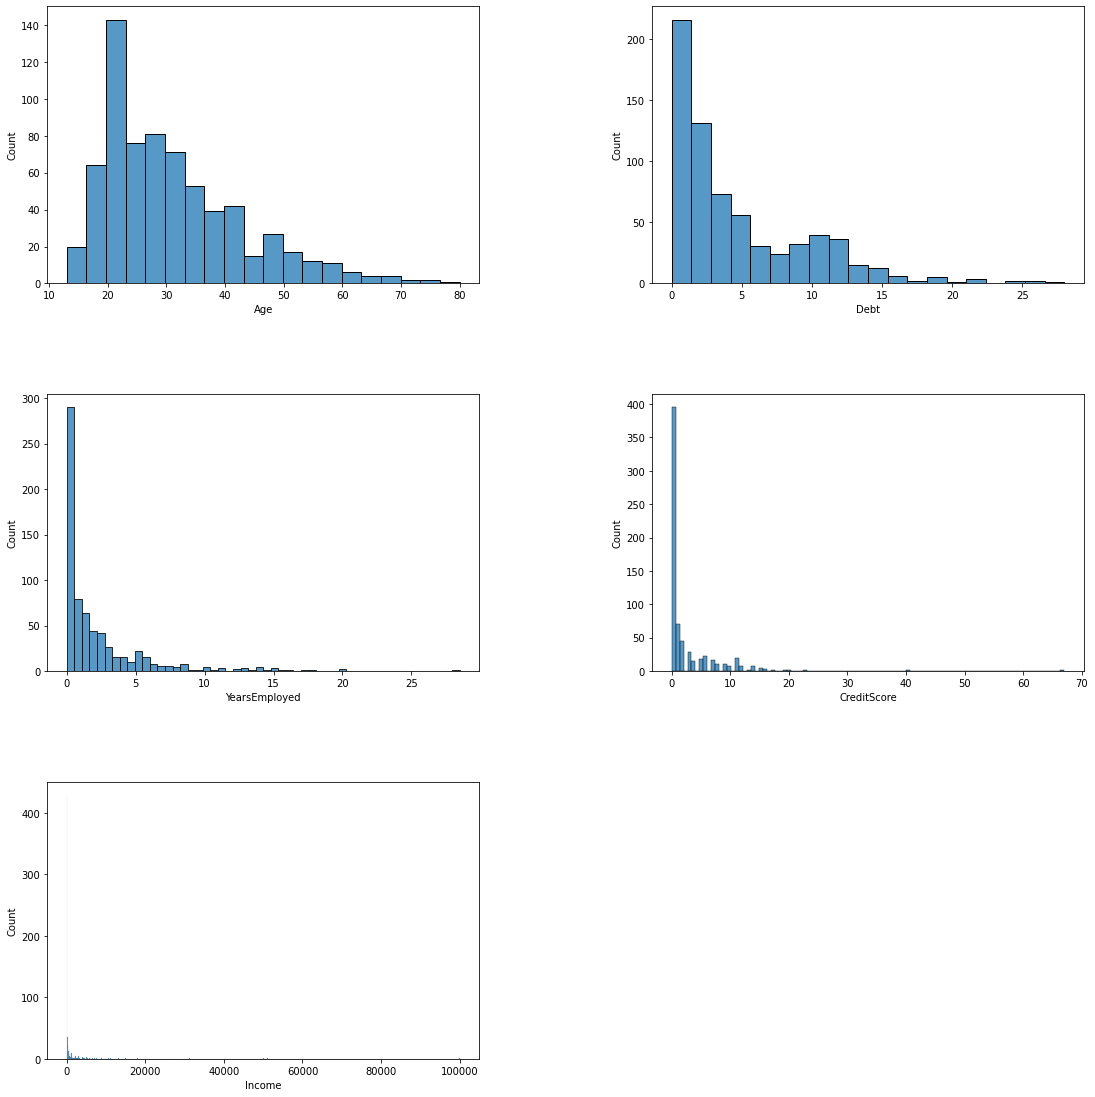

In [29]:
plt.figure(figsize= (18,25))
for i in enumerate(numeric_variables):
  plt.subplot(4,2,i[0]+1)
  sns.histplot(x=i[1],data=data)
  plt.xticks(rotation = 0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

The main focus of viewing the distribution of the numeric variables is to check.


1.   The range of each variable.
2.   If the values make sense for the variables. e.g negative value for Age.




*   'Age': There are no negative values and the max value is reasonable.
*   'Debt': There are no negative values. However, the values appear to be scaled.
*   'YearsEmployed': There are no negative values, the range of values is acceptable.
*   'CreditScore': There are no negative values. However, the range does not follow the traditional credit score range (300-850). The values have been scaled.
*   'Income': There are no negative values. The range of values span from (0-100000) which appears reasonable for USD. However it is concerning how the majority of the observations lie in the (0-20000) range. 

Takeaways: We have established that 'Debt' and 'CreditScore' have been scaled and the data we imported has no information on the scaler used. This is an issue because if we want to test our model with new data it must follow the same data transformations that were used in training the model. If we do not know how to scale and transform new data to match what the model expects, then we are bound to receive inaccurate results. 

Addressing outliers: We can investigate the outliers and determine how to deal with them. Whether it is worth removing outliers for specific variables. We don't want outliers to skew the model training process. It may affect how well our model can generalize the data.





## Handling outliers

In [30]:
# use IQR to filter out and remove the outliers

q3 = data.quantile(.75)
q1 = data.quantile(.25)
IQR = q3-q1

lowerbound = q1-1.5*IQR
upperbound = q3+1.5*IQR

print("Minimum Threshold\n",lowerbound)
print("Maximum Threshold\n",upperbound)

Minimum Threshold
 Age               -0.50000
Debt              -8.31125
YearsEmployed     -3.52500
CreditScore       -4.50000
Income          -593.25000
dtype: float64
Maximum Threshold
 Age               59.50000
Debt              16.51875
YearsEmployed      6.31500
CreditScore        7.50000
Income           988.75000
dtype: float64


We have defined the minimum and maximum thresholds for the numeric variables. If there are any observations whose values for any of these variables fall outside the range we have defined we will remove the row from the dataset. 

Let's first check how many outliers we detect before removing any observations.

In [31]:
def show_upper_outlier_amount(columns):
  for i in enumerate(columns):
    print("Number of values that exceed the upper threshold for ",i[1], ":",len(data[data[i[1]] > upperbound[i[1]]]))

def show_lower_outlier_amount(columns):
  for i in enumerate(columns):
    print("Number of values that exceed the lower threshold for ",i[1], ":",len(data[data[i[1]] < lowerbound[i[1]]]))

show_upper_outlier_amount(numeric_variables)
print("\n")
show_lower_outlier_amount(numeric_variables)

Number of values that exceed the upper threshold for  Age : 19
Number of values that exceed the upper threshold for  Debt : 17
Number of values that exceed the upper threshold for  YearsEmployed : 63
Number of values that exceed the upper threshold for  CreditScore : 79
Number of values that exceed the upper threshold for  Income : 113


Number of values that exceed the lower threshold for  Age : 0
Number of values that exceed the lower threshold for  Debt : 0
Number of values that exceed the lower threshold for  YearsEmployed : 0
Number of values that exceed the lower threshold for  CreditScore : 0
Number of values that exceed the lower threshold for  Income : 0


The number of outliers for 'Income' is quite large. 
The range of acceptable value for 'Income' is ~(-600,1000) and the range of values in the dataset spans from (0,100000). The mean value for 'Income' is ~1040.

In [32]:
data.drop(data[data.Income > upperbound.Income].index, inplace = True)
print(data.shape)

show_upper_outlier_amount(numeric_variables)

(577, 13)
Number of values that exceed the upper threshold for  Age : 14
Number of values that exceed the upper threshold for  Debt : 10
Number of values that exceed the upper threshold for  YearsEmployed : 42
Number of values that exceed the upper threshold for  CreditScore : 45
Number of values that exceed the upper threshold for  Income : 0


Let's only remove the outliers of Income, they were responsible for the largest amount of outliers and removing any more rows will limit the already very limited dataset.

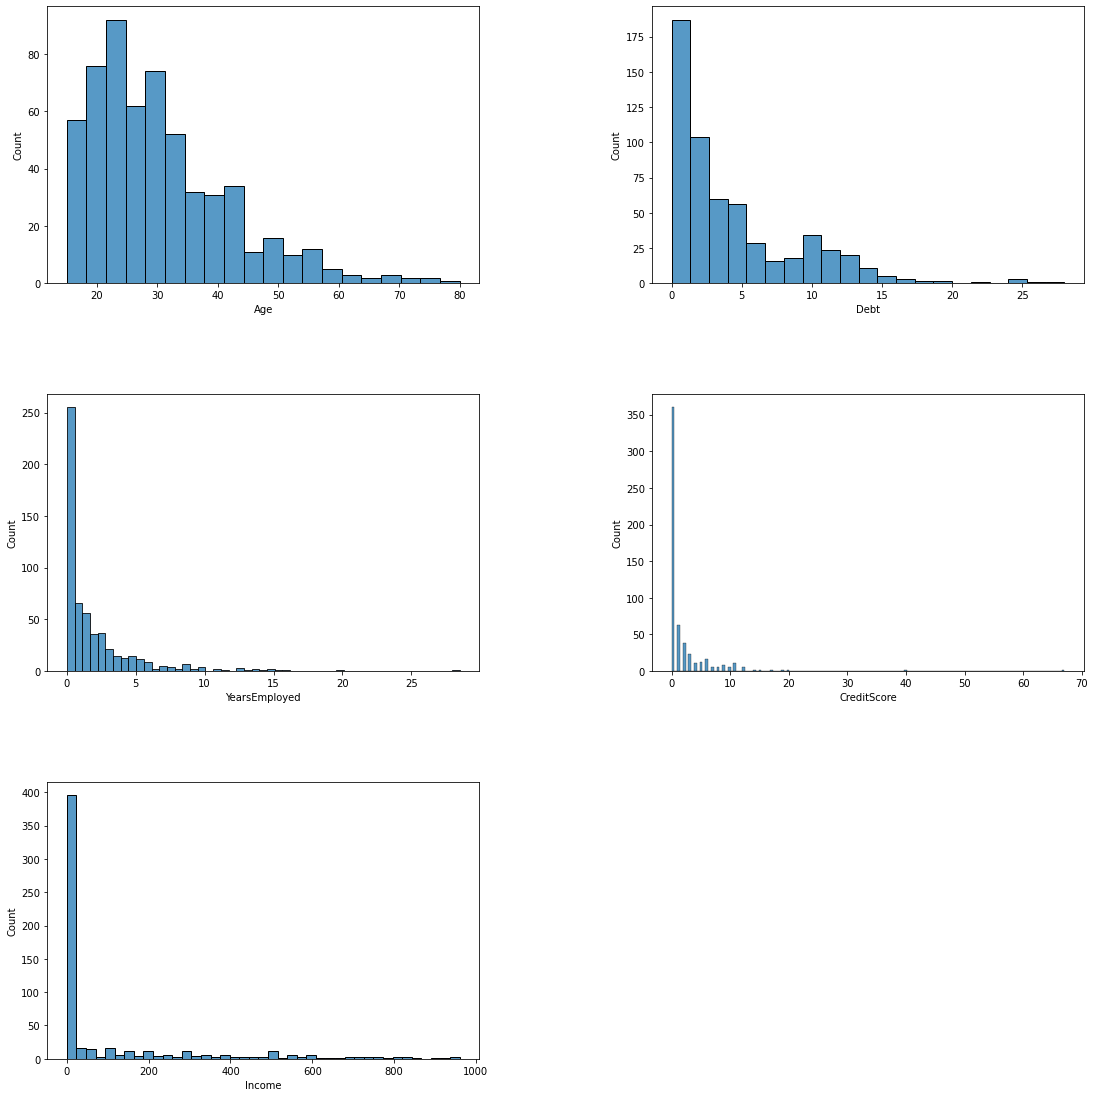

In [33]:
plt.figure(figsize= (18,25))
for i in enumerate(numeric_variables):
  plt.subplot(4,2,i[0]+1)
  sns.histplot(x=i[1],data=data)
  plt.xticks(rotation = 0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Saving and Exporting data

Let's export and save the data into a new excel sheet where we can use in the future and it will already be in working format for any ML experimentation.

In [34]:
data.to_csv("drive/My Drive/prepared_credit_data.csv", index = False)

# Exploratory Data Analysis

We have cleaned the data and made it easier to read and understand. Lets perform EDA to further our understanding of the data and try to find any trends or interesting aspects of our data.

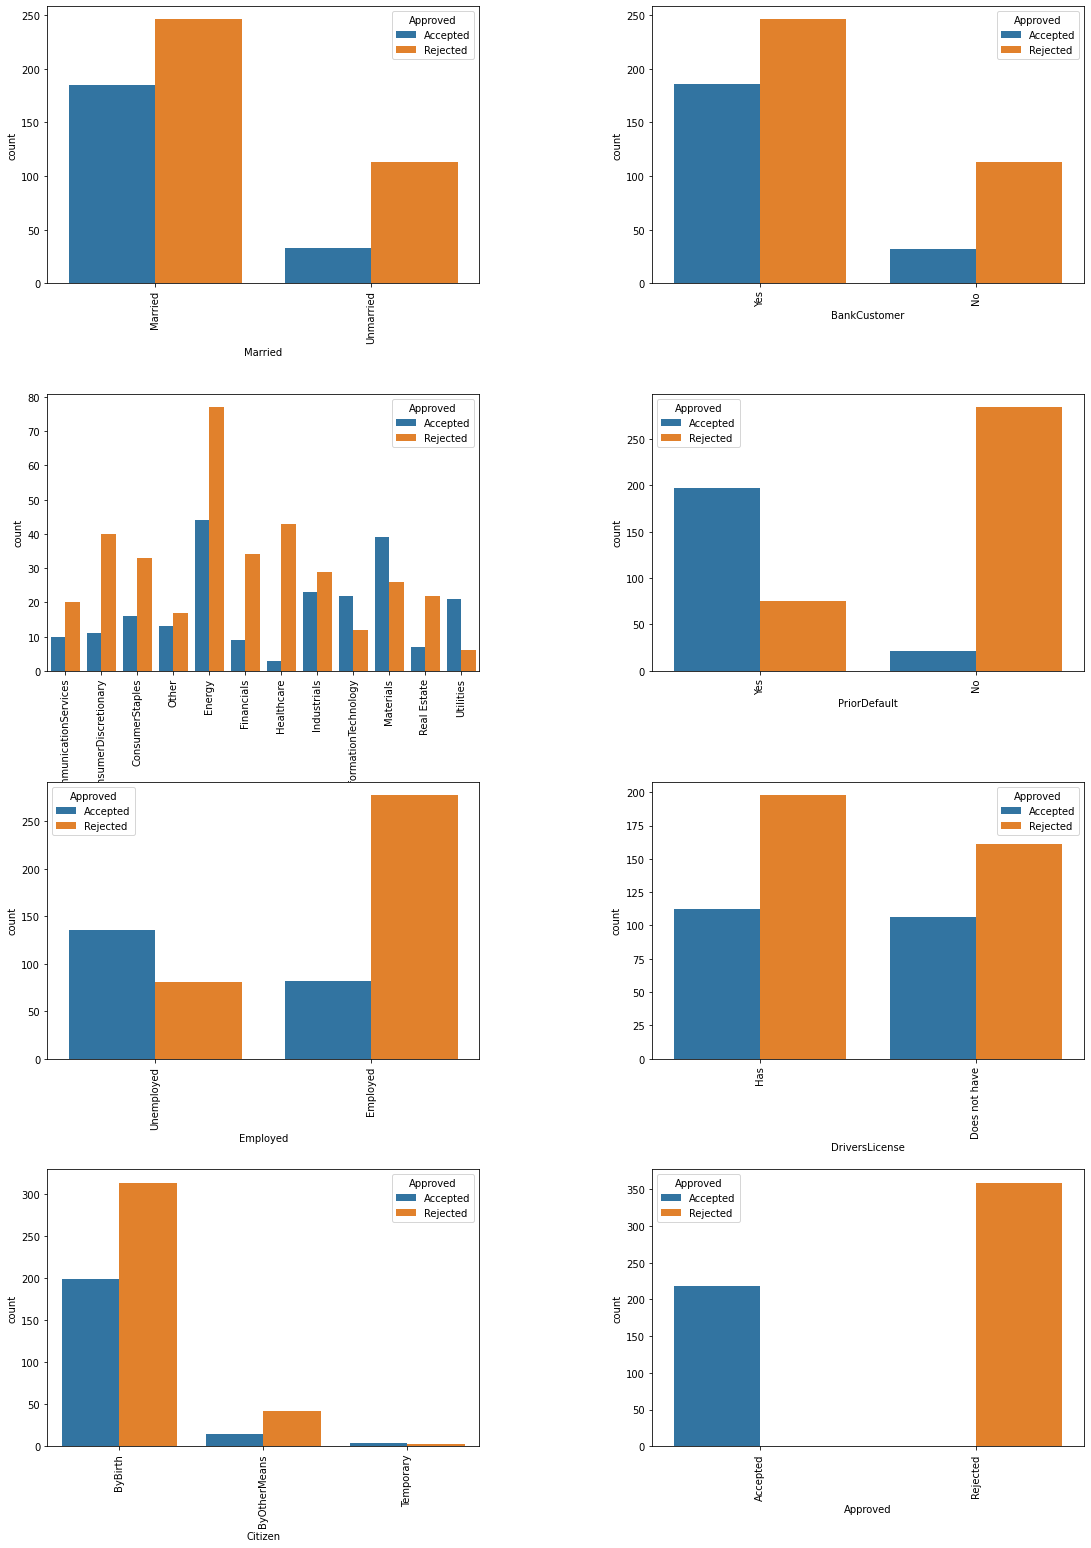

In [35]:
#Let's view the categorical variables as countplots again but this time we will use the 'Approved' label as a visual layer.

plt.figure(figsize= (18,25))
for i in enumerate(categorical_variables):
  plt.subplot(4,2,i[0]+1)
  sns.countplot(x=i[1],data=data, hue = 'Approved')
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

One takeaway we can infer from the plots is whether the variables have an influence on credit card approvals.

We can make these inferences by checking if there is a clear discrepancy between approved and denied applicants for each of the categories.

'PriorDefault' seems to have an effect on whether applicants are rejected or aproved. 

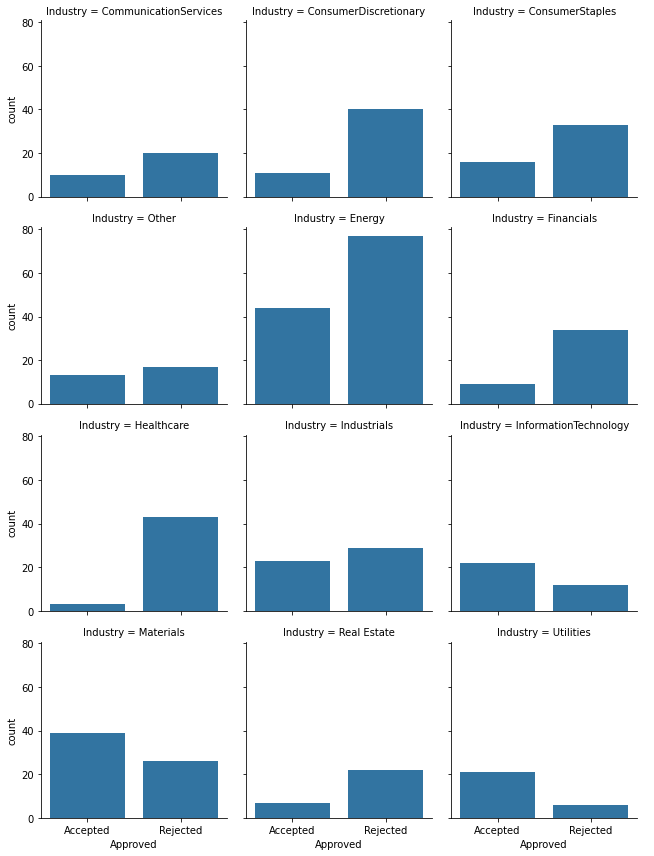

In [36]:
df_Industry = data[['Debt','Industry','Approved']]
g = sns.FacetGrid(df_Industry, col="Industry",col_wrap=3)
g.map_dataframe(sns.countplot, x="Approved")
g.add_legend()

For the most part it isn't visualy clear if Industry has an impact on applicant approval.

There is one Industry where there is an obvious discrepancy between accepted and rejected applicants where Industry = 'HealthCare'. Let's try to find out why this is the case.

In [37]:
#Filter for all the rows where Industry = HealthCare.

df_HealthCare = data.loc[(data['Industry'] == "Healthcare"),:]

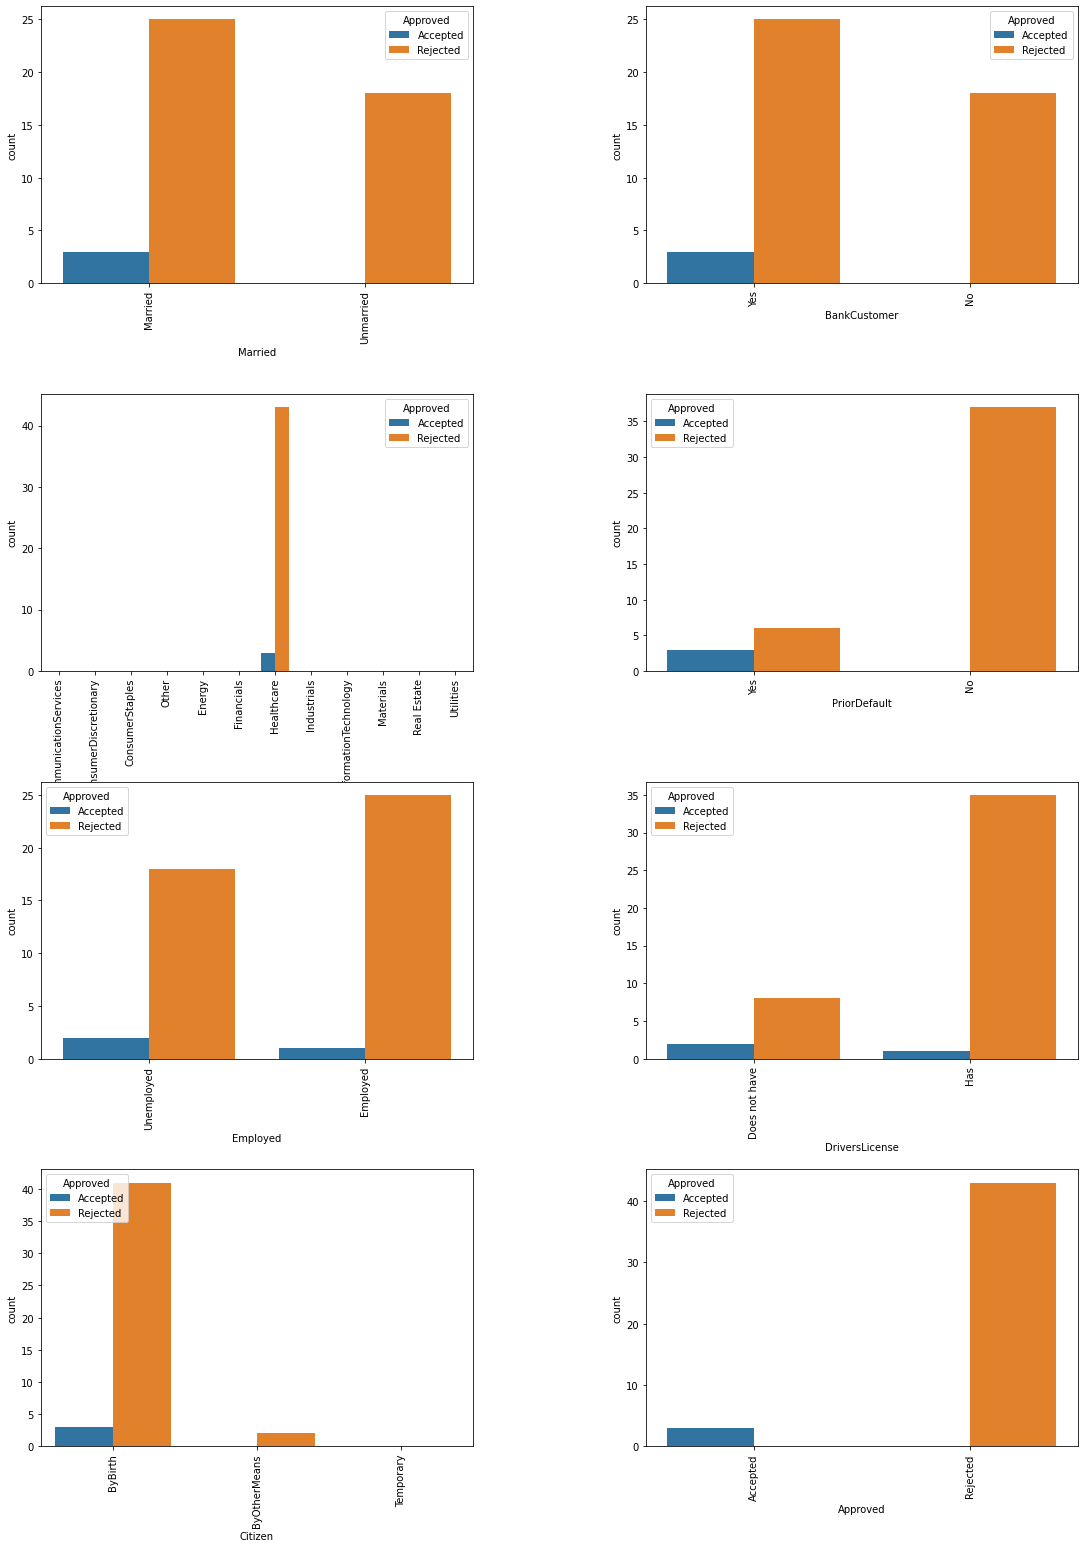

In [38]:
#Lets view the countplots of the numeric and categorical values

plt.figure(figsize= (18,25))
for i in enumerate(categorical_variables):
  plt.subplot(4,2,i[0]+1)
  sns.countplot(x=i[1],hue='Approved',data=df_HealthCare)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

By viewing the countplots of all categorical variables filtered by Industry==Healthcare there are a few interesting things to note. First, it appears that the Married variable doesn't have any influence on Credit approvals. The same for BankCustomers. PriorDefault does seem to have some influence, as we had previously suspected. The employed variable doesn't seem to have influence either, however it is interesting that there are observations where Employed==0; indicating that some of the applicants are not employed yet there is an entry for Industry. Viewing the DriversLicense we see there are alot of applicants who do not have a license, we should investigate the age distribution of this subset of applicants.

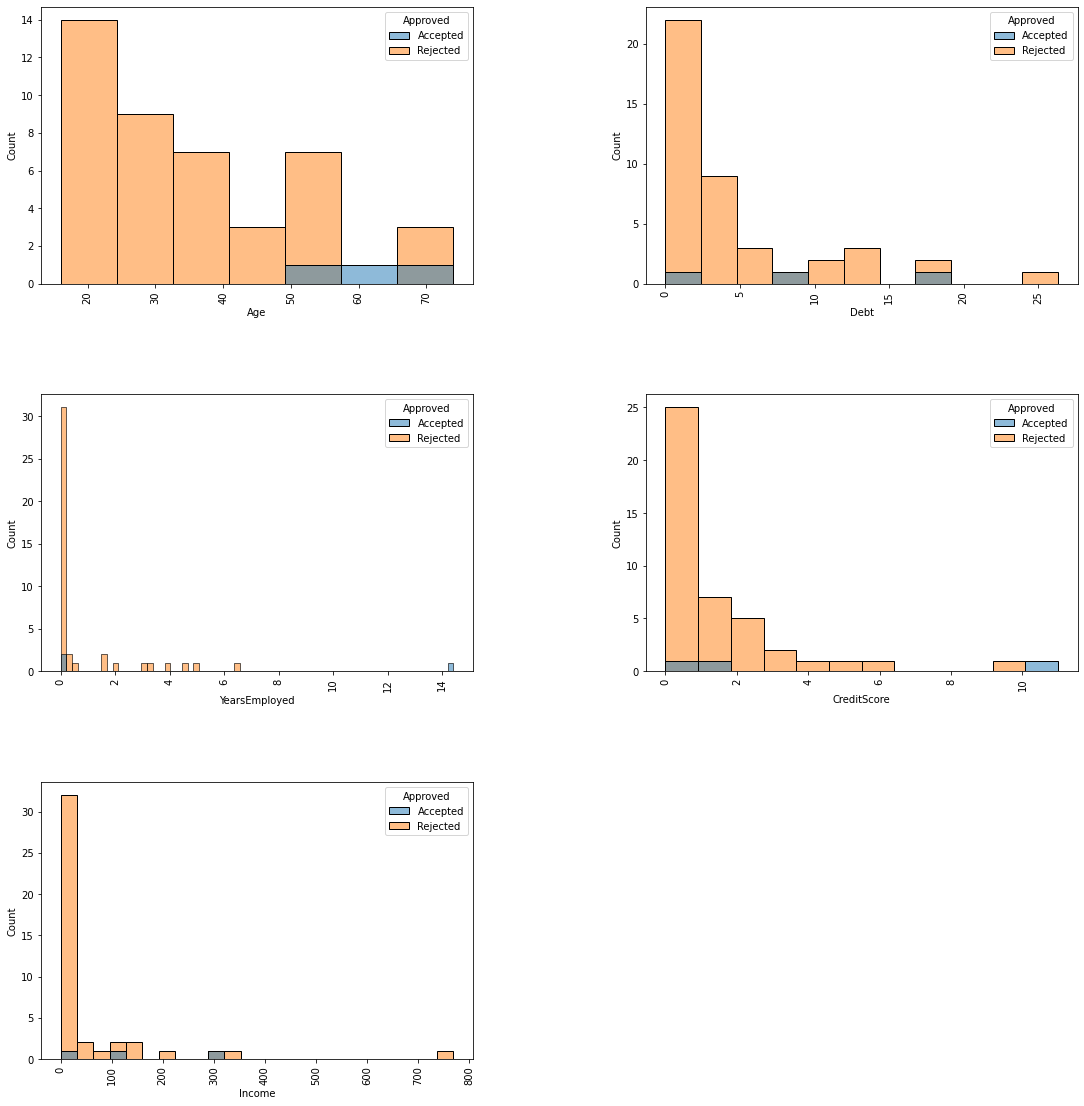

In [39]:
plt.figure(figsize= (18,25))
for i in enumerate(numeric_variables):
  plt.subplot(4,2,i[0]+1)
  sns.histplot(x=i[1],hue='Approved',data=df_HealthCare)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

##Let's explore the numeric variables

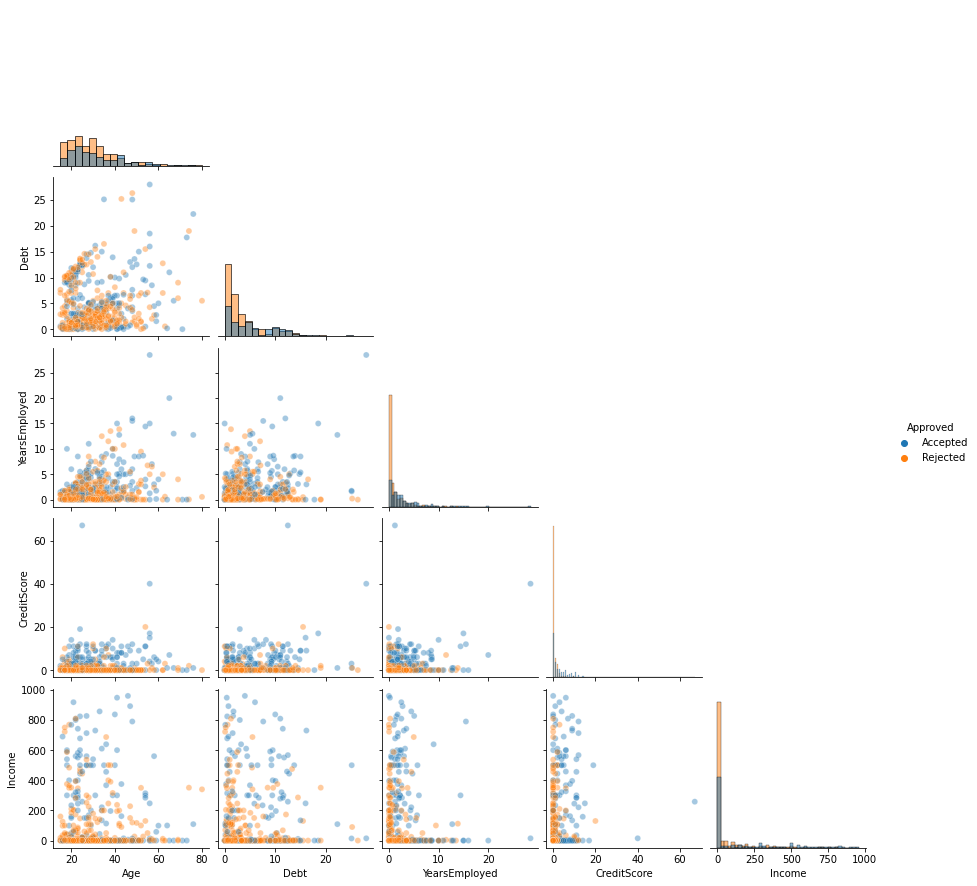

In [40]:
df_numeric_variables = data[['Age','Debt','YearsEmployed','CreditScore','Income','Approved']]
sns.pairplot(data = df_numeric_variables,kind="scatter",plot_kws={'alpha': 0.4}, hue='Approved',corner=True,diag_kind="hist")
plt.show()

There isn't a clear relationship between any of the pairplots. Let's make a heatmap and look at the correaltion values.

In [41]:
data.corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.169750,0.346482,0.105374,-0.023502
Debt,0.169750,1.000000,0.249392,0.262427,0.051141
YearsEmployed,0.346482,0.249392,1.000000,0.270204,0.008992
CreditScore,0.105374,0.262427,0.270204,1.000000,0.194598
Income,-0.023502,0.051141,0.008992,0.194598,1.000000


In [42]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

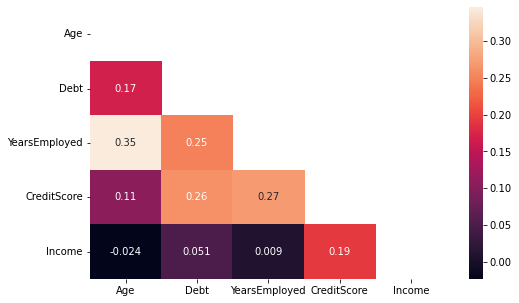

In [44]:
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

After exploring the potential relationships between the numeric variables there does not appear to be any strongly linear relations between any of the pairs. Because there is not a strong linear relation does not exclude the possibility that there could be some correlation.

#Model Training

Since this is a binary classification problem we will focus on models that work best with the type. 

*   Logistic Regression
*   Decision Trees
*   Ensembles



Since we have a combination of numeric and categorical features we will need to use dummy variables to treat our categorical variables as integer values when training the model.

##One-Hot Encoding the data

In [45]:
display(pd.get_dummies(data = data).columns)
display(data.columns)

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income',
       'Married_Married', 'Married_Unmarried', 'BankCustomer_No',
       'BankCustomer_Yes', 'Industry_CommunicationServices',
       'Industry_ConsumerDiscretionary', 'Industry_ConsumerStaples',
       'Industry_Other', 'Industry_Energy', 'Industry_Financials',
       'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Utilities', 'PriorDefault_No',
       'PriorDefault_Yes', 'Employed_Employed', 'Employed_Unemployed',
       'DriversLicense_Does not have', 'DriversLicense_Has', 'Citizen_ByBirth',
       'Citizen_ByOtherMeans', 'Citizen_Temporary', 'Approved_Accepted',
       'Approved_Rejected'],
      dtype='object')

Index(['Age', 'Debt', 'Married', 'BankCustomer', 'Industry', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen',
       'Income', 'Approved'],
      dtype='object')

In [46]:
data2 = data.copy()

data_dummies = pd.get_dummies(data = data2)
dummy_features = data_dummies.loc[:,'Age':'Citizen_Temporary']
X_dummy = dummy_features.values
y_dummy = data_dummies['Approved_Rejected'].values
print("X_dummy.shape: {} y_dummy.shape{}".format(X_dummy.shape, y_dummy.shape))
features = data2.loc[:,'Age':'Income']
X = features.values
y = data2['Approved']
print("X.shape: {} y.shape{}".format(X.shape, y.shape))

X_dummy.shape: (577, 30) y_dummy.shape(577,)
X.shape: (577, 12) y.shape(577,)


## Splitting the Data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, random_state = 0)

##Scaling the Data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scale a.k.a 'fit' only on the training data then transform on both the training and test 
#if we were to fit fot train and test separately then the scale will differ between the two splits which changes the arrangement of the data
scaler.fit(X_train)
#transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Logistic Regression (Train: 85, Test: 86)

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 
#now that we have scaled the data lets train it
logreg.fit(X_train_scaled, y_train)

print("Train set accuracy: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_scaled, y_test)))

Train set accuracy: 0.85
Test set accuracy: 0.86


##Decision Trees (Train: 88, Test: 83)

In [50]:
from sklearn.tree import DecisionTreeClassifier

#Decision trees do not need the data to be scaled.
#Therefore we can use the unscaled data.

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Train set accuracy: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.2f}\n".format(tree.score(X_test, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.79



### Addressing Decision Tree Overfitting

Note that our training accuracy is yielding 100% success rate. One of the cons of using Decision Trees is that they are susceptible to overfitting from the data. To restrict overfitting the model, prune the data by either limiting the depth level or the number of leaves (max_depth, max_leaf_nodes, min_leaf_nodes)

In [51]:
#Lets limit the amount of levels of the tree to 4:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

Train set accuracy: 0.88
Test set accuracy: 0.83


The training set accuracy dropped 12% and the test set accuracy increased 4%

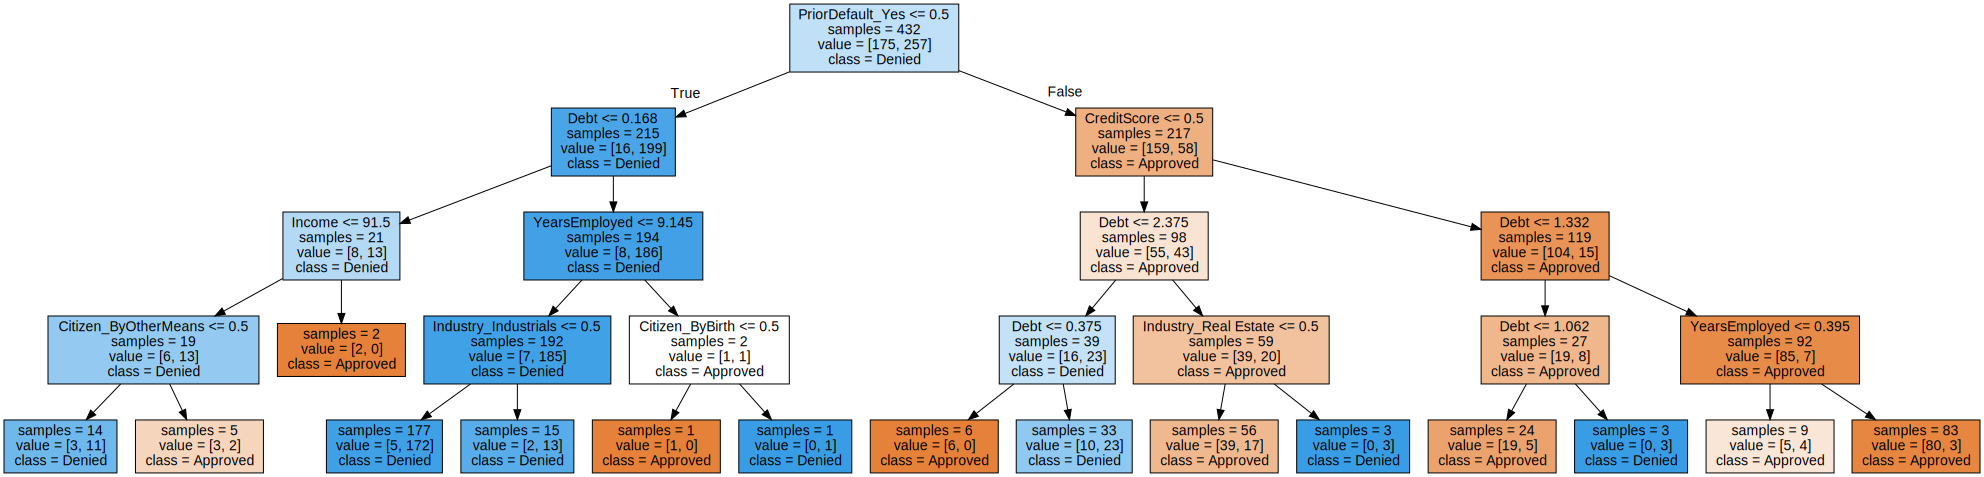

In [52]:
#Let's visualize the tree using graphviz
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz(tree, out_file = "tree.dot", class_names = ["Approved", "Denied"], 
                feature_names = dummy_features.columns, impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Decision Tree Feature Importance

In [53]:
#Let's also look at the importance features the decision tree extraced.
print("Feature importances: ")
print(len(tree.feature_importances_))
print(len(dummy_features.loc[1,:]))

Feature importances: 
30
30


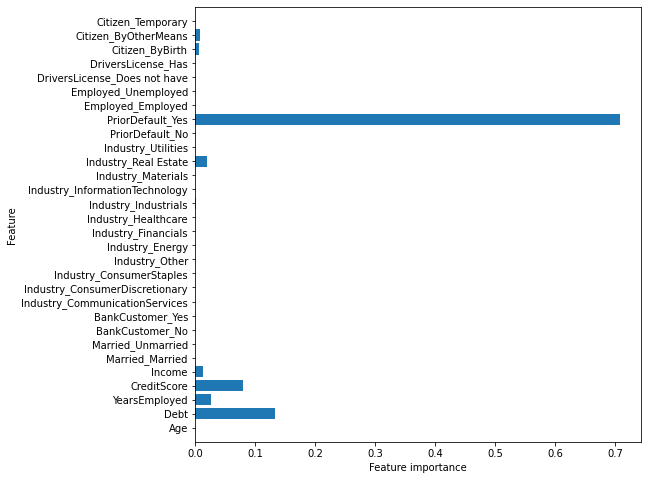

In [54]:
def plot_feature_importances(model):
  plt.figure(figsize = (8,8))
  n_features = dummy_features.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), dummy_features.columns)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

plot_feature_importances(tree)

Here we see that the variable PriorDefault has the highest importance according to the Decision tree

## Ensembles

Lets explore another method of reducing training accuracy for Decision Trees.


We will explore 2 types of Ensembles: Random Forests and Gradient Boosted Decision Trees

### Random Forests (Train: 89, Test: 88) Best Results

A random forest is a collection of decision trees, the main idea is that each decision tree
is slightly different from the rest. If we build several trees that will do a good job at predicting
but also slightly overfit we can reduce the overfitting by averaging the performance of the trees

In [55]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators = # of trees in the forest
forest = RandomForestClassifier(n_estimators=100, random_state = 0, max_features = int(np.sqrt(len(dummy_features.columns))), max_depth=5)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.89
Accuracy on test set: 0.88


We see another increase from the previous results of our Decision Tree. (This is the best performance of any model thus far)

In [56]:
forest.feature_importances_

array([0.0317196 , 0.06587155, 0.08810165, 0.08363026, 0.04913249,
       0.00550404, 0.00791752, 0.00523005, 0.00707727, 0.00224292,
       0.00185633, 0.0024389 , 0.00281265, 0.00410025, 0.00582098,
       0.01229057, 0.00628256, 0.00739835, 0.00739799, 0.00604568,
       0.0060984 , 0.19808939, 0.28132583, 0.04835367, 0.03822752,
       0.00720011, 0.00644814, 0.00510425, 0.00531424, 0.00096684])

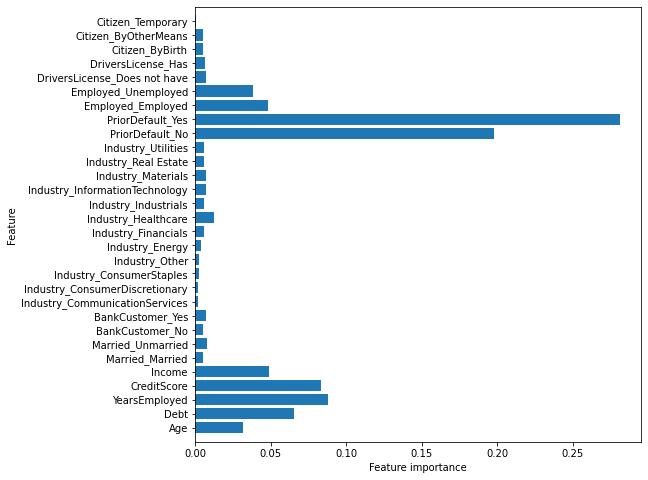

In [57]:
plot_feature_importances(forest)

Using a random forest of 100 decision trees we see how drastically the feature importance has changed. PriorDefault changed from ~70% to ~30%, while other variables such as Income, CreditScore, and others have more importance in the model.

### Gradient Boosted Decision Tree (Train:96, Test: 86)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on testing set: 0.86


We yielded great results, Let's try to improve by tweaking some parameters of the classifier.

In [59]:
#Gradient Boosted Decision Trees + max_depth

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.85
Accuracy on testing set: 0.88


In [60]:
#Gradient Boosted Decision Trees + learning_rate

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.88
Accuracy on testing set: 0.84


In [61]:
#Gradient Boosted Decision Trees + max_depth & learning_rate

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.83
Accuracy on testing set: 0.85


The best gbrt classifier the first one we started with.

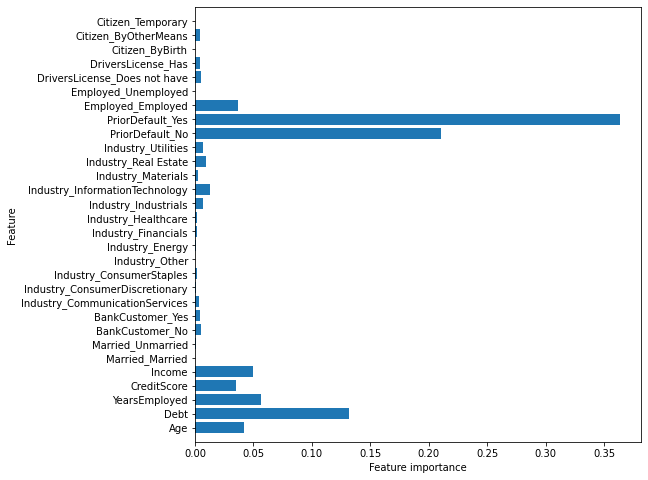

In [62]:
#Gradient Boosted Decision Tree with default settings. (Train: 96, Test: 86)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

plot_feature_importances(gbrt)

##Picking a model to fine-tune

Let's select the RandomForestClassifier for the model we will fine-tune.
In addition to attempting to optimize this model, we will also look at other metrics of performance and make sure we stick to the business objective.

### Cross-Validation

In [63]:
#Let's try a k-fold cross validation method of training our model.
from sklearn.model_selection import cross_val_score

#Let's also stick with the following model:
forest = RandomForestClassifier(n_estimators=100, random_state = 0, max_features = int(np.sqrt(len(dummy_features.columns))), max_depth=5)
forest.fit(X_train, y_train)


scores = cross_val_score(forest, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.77272727 0.75       0.88372093 0.8372093  0.81395349 0.97674419
 0.86046512 0.86046512 0.79069767 0.86046512]
Average cross-validation score: 0.8406448202959831


###Grid Search

Grid search is an excellent choice to test out different combinations of hyperparameters of the classifier we are working with.

In our case we are using a RandomForest, so the hyperparameters we will test with are: n_estimators, max_features, bootstrap, and max_depth

In [64]:
from sklearn.model_selection import GridSearchCV
#setting up a grid: here we are telling the grid search to try 3x5 combinations of n_estimators and max_features
#with the defined values for each of the parameters.
#Then we try the next pair of parameters and so forth.
param_grid = [
              {'n_estimators':[1,10,100], 'max_depth':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators': [1,10,100]},
              {'n_estimators':[1,10,100], 'max_features':[1,2,4,6,8]}
]

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring='accuracy', return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=5,
                                              random_state=0),
             param_grid=[{'max_depth': [2, 4, 6, 8],
                          'n_estimators': [1, 10, 100]},
                         {'bootstrap': [False], 'n_estimators': [1, 10, 100]},
                         {'max_features': [1, 2, 4, 6, 8],
                          'n_estimators': [1, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [65]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [66]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, random_state=0)

In [67]:
grid_search.best_score_

0.8495322106388665

In [68]:
results = pd.DataFrame(grid_search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_bootstrap,param_max_features,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003218,0.000892,0.001001,0.000232,2,1,NaN,NaN,"{'max_depth': 2, 'n_estimators': 1}",0.586207,...,0.652874,0.036950,30,0.698551,0.666667,0.664740,0.684971,0.705202,0.684026,0.016332
1,0.018874,0.001672,0.002738,0.000687,2,10,NaN,NaN,"{'max_depth': 2, 'n_estimators': 10}",0.793103,...,0.826357,0.028391,16,0.823188,0.823188,0.835260,0.835260,0.841040,0.831588,0.007175
2,0.155951,0.007255,0.016696,0.002291,2,100,NaN,NaN,"{'max_depth': 2, 'n_estimators': 100}",0.793103,...,0.828682,0.029633,14,0.852174,0.826087,0.841040,0.835260,0.841040,0.839120,0.008515
3,0.002754,0.000061,0.000901,0.000033,4,1,NaN,NaN,"{'max_depth': 4, 'n_estimators': 1}",0.724138,...,0.708153,0.041579,28,0.817391,0.791304,0.713873,0.777457,0.820809,0.784167,0.038688
4,0.016843,0.000387,0.002319,0.000022,4,10,NaN,NaN,"{'max_depth': 4, 'n_estimators': 10}",0.781609,...,0.840364,0.031660,6,0.872464,0.860870,0.867052,0.872832,0.878613,0.870366,0.005994


Based on the best params calculated by the Grid Search lets build our model again and see how the performance has changed

In [69]:
forest = RandomForestClassifier(n_estimators=100, random_state = 0, max_features = 2, max_depth=6)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.88


There is hardly any improvement in terms of accuracy, However we still have a high performing model.

###Randomized Grid Search

As opposed to GridSearch, Randomized GS does not require pre-defined combinations of hyperparameters we want to test. Choosing the correct hyperparameters may not be feasible, therefore we will try using Randomized GridSearch.

In [70]:
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp
from scipy.stats import uniform
paramas = [
              {'n_estimators', 'max_depth'},
              {'bootstrap', 'n_estimators'},
              {'n_estimators', 'max_features'}
]
distributions = dict(n_estimators=[1,10,100,1000],
                     max_depth = [1,2,4,6,8],
                     bootstrap = [True,False],
                     max_features = [1,2,4,6,8,10],
                     criterion = ['gini','entropy','log_loss'],
                     ccp_alpha = [0.01,0.1,1,10,100]
                     )


random_grid_search = RandomizedSearchCV(forest, distributions, n_iter=10, cv = 5, scoring = 'accuracy', return_train_score = True)
random_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/paral

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=6, max_features=2,
                                                    random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 4, 6, 8],
                                        'max_features': [1, 2, 4, 6, 8, 10],
                                        'n_estimators': [1, 10, 100, 1000]},
                   return_train_score=True, scoring='accuracy')

In [71]:
random_grid_search.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 2,
 'n_estimators': 100}

In [72]:
random_grid_search.best_score_

0.8310344827586208

##Exploring other Performance Metrics

In [82]:
forest = RandomForestClassifier(n_estimators=100, random_state = 0, max_features = 2, max_depth=6)
var = forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.88


In [91]:
from sklearn.metrics import confusion_matrix

tree_pred = forest.predict(X_test)
confusion = confusion_matrix(y_test, tree_pred)

print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[33 10]
 [ 7 95]]


Understanding the confusion matrix

The first cell corresponds to the True Negative values, False Positives, False Negatives, True Positives.

In [92]:
#Calculating Accuracy by hand
#accuracy = TP + TN / TP + TN + FP + FN

test_acc = (33+95)/(33+95+7+10)
print("Test set accuracy:{}".format(test_acc))

Test set accuracy:0.8827586206896552


In [93]:
#Calculating Precision which measures how many of the samples predicted as positive are actually positive.
#Precision is important when we want to limit False Positives
#Precision = (TP)/(TP+FP)

test_precision = 95/(95+10)
print("Test set precision:{}".format(test_precision))

Test set precision:0.9047619047619048


In [94]:
#Calculating Recall which measures how many of the positive samples are captured by the positive predictions.
#Recall is important when we want to avoid False Negatives.
#Recall = (TP)/(TP+FN)


test_recall = (95)/(95+7)
print("Test set recall:{}".format(test_recall))

Test set recall:0.9313725490196079


In [95]:
#f-score or f-measure is a measure to summarize both the precision and recall.
#which is with the harmonic mean of precision and recall.

from sklearn.metrics import f1_score

print("f1 score:{}".format(f1_score(y_test, tree_pred)))

f1 score:0.9178743961352657


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred, target_names=["Rejected","Accepted"]))

              precision    recall  f1-score   support

    Rejected       0.82      0.77      0.80        43
    Accepted       0.90      0.93      0.92       102

    accuracy                           0.88       145
   macro avg       0.86      0.85      0.86       145
weighted avg       0.88      0.88      0.88       145



Referring back to the business objective and seeking to reduce the number of False Positives; that means we want to prioritize Precision.

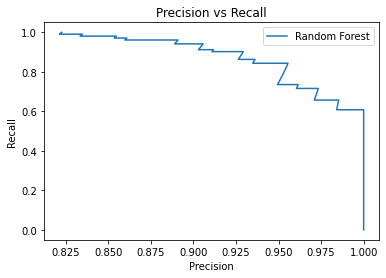

In [105]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, forest.predict_proba(X_test)[:,1])

plt.plot(precision_rf, recall_rf, label='Random Forest')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision vs Recall")
plt.legend(loc='best')

Plot the ROC curve of the RandomForest model

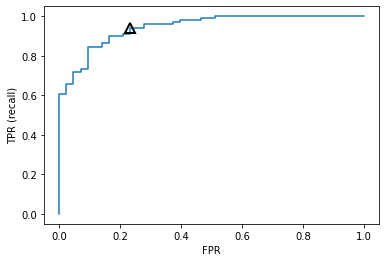

In [112]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label = 'ROC Curve RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
close_default = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[close_default], tpr[close_default], '^', markersize = 10, label = 'Threshold 0.5 RF', 
         fillstyle = 'none', c='k', mew = 2)